In [16]:
# importing the dependencies
import pandas as pd
import numpy as np
import itertools
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import time
import xgboost
from xgboost import XGBClassifier
import time

In [2]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

using unigram features

In [3]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [4]:
# loading the cleaned training tweets
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [5]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)

In [6]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [7]:
# checking the shape of the output variable
y.shape

(99989,)

In [8]:
# checking the shape of the input matrix -- this is feed into the classifier for training
X.shape

(99989, 41679)

In [9]:
# splitting into training and testing set so as to evaluate our classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [27]:
i = 1
values_max_depth = []
while i<=10:
    model = XGBClassifier(max_depth = i)
    model.fit(X_train, y_train)
    values_max_depth.append(model.score(X_test, y_test))
    i = i +1

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array 

In [28]:
print(values_max_depth)

[0.6501650165016502, 0.6767676767676768, 0.6972197219721972, 0.7073207320732073, 0.7151215121512151, 0.7187718771877187, 0.7229222922292229, 0.7287228722872288, 0.7336733673367337, 0.7356235623562356]


In [29]:
i = 5
values_subsample = []
while i<=10:
    model = XGBClassifier(subsample = i/10)
    model.fit(X_train, y_train)
    values_subsample.append(model.score(X_test, y_test))
    i = i +1

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array 

In [30]:
print(values_subsample)

[0.7015201520152016, 0.6974197419741974, 0.6992199219921992, 0.6965696569656966, 0.6983698369836984, 0.6972197219721972]


In [31]:
i = 5
values_colsample_bytree = []
while i<=10:
    model = XGBClassifier(colsample_bytree = i/10)
    model.fit(X_train, y_train)
    values_colsample_bytree.append(model.score(X_test, y_test))
    i = i +1

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array 

In [32]:
print(values_colsample_bytree)

[0.6925692569256926, 0.6956695669566957, 0.6966196619661966, 0.6953195319531953, 0.696019601960196, 0.6972197219721972]


In [37]:
model = XGBClassifier(seed = 0,verbose =1)

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
curr_time = time.time()

max_depth = [7,8,9,10]
subsample = [0.7,.8,.9]
colsample_bytree = [.5,.6,.7]
n_estimators= [500,1000,1500,2000]
param_grid = {'max_depth': max_depth, 'subsample' :subsample, 'colsample_bytree' : colsample_bytree,'n_estimators' :n_estimators  }

grid_search = GridSearchCV(model, param_grid, cv=2, n_jobs = 4)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(grid_search.best_params_)

updated_time = time.time()
time_taken = (updated_time - curr_time)/60
print("time taken for the job: ",time_taken)

In [43]:
model = XGBClassifier(seed = 0,colsample_bytree = .6, max_depth = 10, subsample=.7,n_estimators = 2500)

In [44]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7)

In [ ]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [45]:
# finally loading the cleaned test tweets on which we have to do sentiment analysis and report to kaggle
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [46]:
X_test=vectorizer.transform(SentimentText)

In [47]:
# checking the shape
X_test.shape

(299989, 41679)

In [48]:
# predicting the sentiments using trained classifier
predicted = model.predict(X_test)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
# shape of the predicted 
predicted.shape

(299989,)

In [50]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)

using bigram features

In [51]:
# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [52]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [53]:
X=bigram_vectorizer.fit_transform(SentimentText)

In [54]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [55]:
X.shape

(99989, 428766)

In [56]:
y.shape

(99989,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [59]:
model = XGBClassifier(seed = 0,colsample_bytree = .6, max_depth = 10, subsample=.7,n_estimators = 2500)

In [62]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7)

In [63]:

# training score
model.score(X_train, y_train)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8907752122113738

In [64]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7772277227722773

Confusion matrix, without normalization
[[6166 2616]
 [1839 9377]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.16 0.84]]


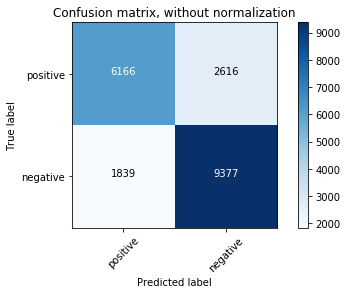

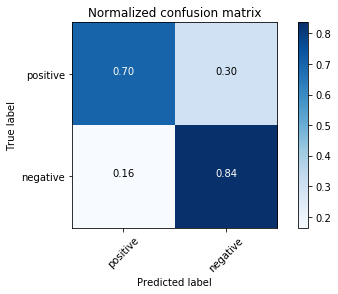

In [65]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [66]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [67]:
X_test=bigram_vectorizer.transform(SentimentText)

In [68]:
X_test.shape

(299989, 428766)

In [69]:
predicted = model.predict(X_test)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
predicted.shape

(299989,)

In [71]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output2.csv', index = False)

using both unigrams and bigrams features

In [72]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [73]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [74]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)

In [75]:
X_unigrams.shape

(99989, 41679)

In [76]:
X_bigrams.shape

(99989, 428766)

In [77]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams])

In [78]:
X_combined.shape

(99989, 470445)

In [79]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [81]:
model = XGBClassifier(seed = 0,colsample_bytree = .6, max_depth = 10, subsample=.7,n_estimators = 2500)

In [83]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7)

In [84]:
# training score
model.score(X_train,y_train)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8978010026127939

In [85]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7787778777877787

Confusion matrix, without normalization
[[6205 2577]
 [1847 9369]]
Normalized confusion matrix
[[0.71 0.29]
 [0.16 0.84]]


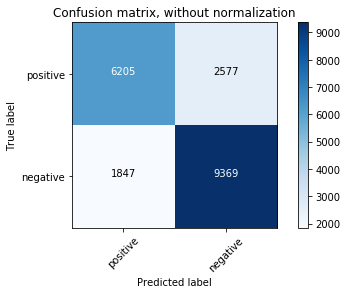

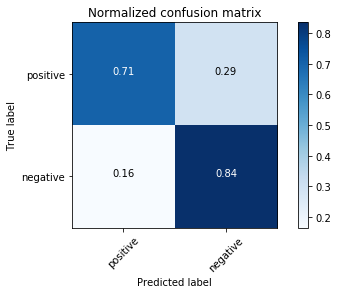

In [86]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [87]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [88]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)

In [89]:
X_test_unigrams.shape

(299989, 41679)

In [90]:
X_test_bigrams.shape

(299989, 428766)

In [91]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams])

In [92]:
X_test_combined.shape

(299989, 470445)

In [93]:
predicted = model.predict(X_test_combined)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [94]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output3.csv', index = False)

using unigrams bigrams and trigrams 

In [105]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

# finding the trigram representation
trigram_vectorizer =CountVectorizer(ngram_range=(1,3))

In [106]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [107]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)
X_trigrams = trigram_vectorizer.fit_transform(SentimentText)

In [108]:
X_unigrams.shape

(99989, 41679)

In [109]:
X_bigrams.shape

(99989, 428766)

In [110]:
X_trigrams.shape

(99989, 1178466)

In [111]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams, X_trigrams])

In [112]:
X_combined.shape

(99989, 1648911)

In [113]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [114]:
y.shape

(99989,)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [116]:
model = XGBClassifier(seed = 0,colsample_bytree = .6, max_depth = 10, subsample=.7,n_estimators = 2500,n_jobs=4)

In [117]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7)

In [118]:
#training score
model.score(X_train,y_train)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8993636784138216

In [119]:
#testing score
model.score(X_test,y_test)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7782778277827783

In [120]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7782778277827783

Confusion matrix, without normalization
[[6195 2587]
 [1847 9369]]
Normalized confusion matrix
[[0.71 0.29]
 [0.16 0.84]]


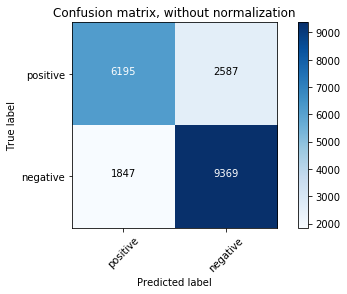

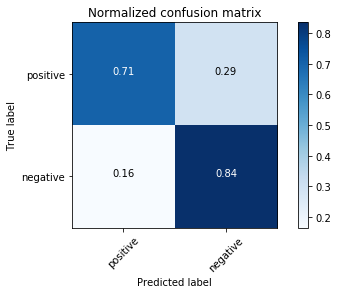

In [121]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [122]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [123]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)
X_test_trigrams = trigram_vectorizer.transform(SentimentText)

In [124]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams,X_test_trigrams])

In [125]:
X_test_combined.shape

(299989, 1648911)

In [126]:
predicted = model.predict(X_test_combined)

C:\Users\ADITYA\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [127]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output4.csv', index = False)